_Lambda School Data Science — Regression 1_

# Understanding Ordinary Least Squares

#### Objectives
- understand how ordinary least squares regression minimizes the sum of squared errors
- understand how linear algebra can solve ordinary least squares regression
- get and interpret coefficients of a linear model
- visualize a line of best fit in 2D, and hyperplane in 3D
- use regression metrics: MSE, RMSE, MAE, R^2

#### Extra Links
- [Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4) (20 minute video)
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 3.1, Simple Linear Regression, & 3.2, Multiple Linear Regression
- Priceonomics, [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- Priceonomics, [Why the Father of Modern Statistics Didn’t Believe Smoking Caused Cancer](https://priceonomics.com/why-the-father-of-modern-statistics-didnt-believe/)
- Harvard Business Review, [When to Act on a Correlation, and When Not To](https://hbr.org/2014/03/when-to-act-on-a-correlation-and-when-not-to)
- [xkcd 552: Correlation](https://www.explainxkcd.com/wiki/index.php/552:_Correlation)
- [xkcd 1725: Linear Regression](https://www.explainxkcd.com/wiki/index.php/1725:_Linear_Regression)

## Simple Linear Regresion

#### Making Predictions

Say that we were trying to create a model that captured the relationship between temperature outside and ice cream sales. In Machine Learning our goal is often different that of other flavors of Linear Regression Analysis, because we're trying to fit a model to this data with the intention of making **predictions** on new data (in the future) that we don't have yet.

#### What are we trying to predict?

So if we had measured ice cream sales and the temprature outside on 11 different days, at the end of our modeling **what would be the thing that we would want to predict? - Ice Cream Sales or Temperature?**

We would probably want to be measuring temperature with the intention of using that to **forecast** ice cream sales. If we were able to successfully forecast ice cream sales from temperature, this might help us know beforehand how much ice cream to make or how many cones to buy or on which days to open our store, etc. Being able to make predictions accurately has a lot of business implications. This is why making accurate predictions is so valuable (And in large part is why data scientists are paid so well).

#### y variable intuition

We want the thing that we're trying to predict to serve as our **y** variable. This is why it's sometimes called the "predicted variable." We call it the "dependent" variable because our prediction for how much ice cream we're going to sell "depends" on the temperature outside. 

#### x variable intuition

All other variables that we use to predict our y variable (we're going to start off just using one) we call our **x** variables. These are called our "independent" variables because they don't *depend* on y, they "explain" y. Hence they are also referred to as our "explanatory" variables.

## Example, reprised: Predict presidential election voting

#### Douglas Hibbs, [Background Information on the ‘Bread and Peace’ Model of Voting in Postwar US Presidential Elections](https://douglas-hibbs.com/background-information-on-bread-and-peace-voting-in-us-presidential-elections/)

> Aggregate two-party vote shares going to candidates of the party holding the presidency during the postwar era are well explained by just two fundamental determinants:

> (1) Positively by weighted-average growth of per capita real disposable personal income over the term.  
> (2) Negatively by cumulative US military fatalities (scaled to population) owing to unprovoked, hostile deployments of American armed forces in foreign wars.

#### Data sources
- 1952-2012: Douglas Hibbs, [2014 lecture at Deakin University Melbourne](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 40
- 2016, Vote Share: [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections)
- 2016, Recent Growth in Personal Incomes: [The 2016 election economy: the "Bread and Peace" model final forecast](https://angrybearblog.com/2016/11/the-2016-election-economy-the-bread-and-peace-model-final-forecast.html)
- 2016, US Military Fatalities: Assumption that Afghanistan War fatalities in 2012-16 occured at the same rate as 2008-12

In [1]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [2]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [3]:
"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

### Acquire new features

#### Shark attack data source
- https://www.sharkattackfile.net/incidentlog.htm (Download the Excel file manually, because web crawlers are blocked)

#### Economic data sources
- Unemployment: https://fred.stlouisfed.org/series/UNRATE
- GDP: https://fred.stlouisfed.org/series/GDPC1
- GDP change: https://fred.stlouisfed.org/series/A191RL1Q225SBEA

In [4]:
# from google.colab import files
# files.upload()

In [5]:
sharks = pd.read_excel('GSAF5.xls')[['Year', 'Country']]
sharks = (sharks
          .where(sharks.Country=='USA')
          .groupby('Year')
          .count()
          .reset_index()
          .rename(columns={'Country': 'Shark Attacks'}))

In [6]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2019-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-05-30&revision_date=2019-05-30&nd=1948-01-01'
unemployment = pd.read_csv(url, parse_dates=['DATE'])

# Annual average unemployment, only using the first 10 months of the year
# (because presidential elections are in November)
unemployment = (unemployment
                .where(unemployment.DATE.dt.month <= 10)
                .set_index('DATE')
                .resample('A')
                .mean()
                .reset_index()
                .rename(columns={'DATE': 'Year', 'UNRATE': 'Unemployment Rate'}))

unemployment['Year'] = unemployment['Year'].dt.year

In [7]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1&scale=left&cosd=1947-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-05-30&revision_date=2019-05-30&nd=1947-01-01'

gdp = pd.read_csv(url, parse_dates=['DATE'])
gdp = (gdp
       .where(gdp.DATE.dt.month==7)
       .rename(columns={'DATE': 'Year', 'GDPC1': 'GDP Q3'}))

gdp['Year'] = gdp['Year'].dt.year

In [8]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=A191RL1Q225SBEA&scale=left&cosd=1947-04-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-05-30&revision_date=2019-05-30&nd=1947-04-01'

gdp_change = pd.read_csv(url, parse_dates=['DATE'])
gdp_change = (gdp_change
              .where(gdp_change.DATE.dt.month==7)
              .rename(columns={'DATE': 'Year', 'A191RL1Q225SBEA': 'GDP Change Q3'}))

gdp_change['Year'] = gdp_change['Year'].dt.year

### Merge data

In [9]:
df = (votes
      .merge(growth)
      .merge(deaths)
      .merge(sharks)
      .merge(unemployment)
      .merge(gdp)
      .merge(gdp_change))

### Engineer new feature

In [10]:
# True Incumbent =
# The Incumbent Party Candidate this election is the same as the Incumbent Party Candidate 1 election ago,
# OR, the Incumbent Party Candidate this election is the same as the Other Candidate 1 election ago
df['True Incumbent'] = ((df['Incumbent Party Candidate'] == df['Incumbent Party Candidate'].shift(1)) | 
                        (df['Incumbent Party Candidate'] == df['Other Candidate'].shift(1)))

# Change the data type of this feature from boolean (True/False) to integer (1/0)
df['True Incumbent'] = df['True Incumbent'].astype(int)

In [11]:
df.groupby('True Incumbent')['Incumbent Party Vote Share'].mean()

True Incumbent
0    50.347778
1    53.493750
Name: Incumbent Party Vote Share, dtype: float64

In [12]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Shark Attacks,Unemployment Rate,GDP Q3,GDP Change Q3,True Incumbent
0,1952,Stevenson,Eisenhower,44.60,2.40,190,11,3.08,2564.401,2.9,0
1,1956,Eisenhower,Stevenson,57.76,2.89,0,9,4.10,2925.035,-0.4,1
2,1960,Nixon,Kennedy,49.91,0.85,0,25,5.38,3274.029,2.0,0
3,1964,Johnson,Goldwater,61.34,4.21,1,14,5.21,3954.121,6.4,0
4,1968,Humphrey,Nixon,49.60,3.02,146,15,3.59,4825.799,3.1,0
5,1972,Nixon,McGovern,61.79,3.62,0,9,5.67,5415.712,3.8,1
6,1976,Ford,Carter,48.95,1.08,2,18,7.68,5965.265,2.2,0
7,1980,Carter,Reagan,44.70,-0.39,0,10,7.14,6688.794,-0.5,1
8,1984,Reagan,Mondale,59.17,3.86,0,21,7.56,7686.059,3.9,1
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,26,5.53,8891.435,2.4,0


### Plot univariate correlations
[Seaborn tutorial: Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)

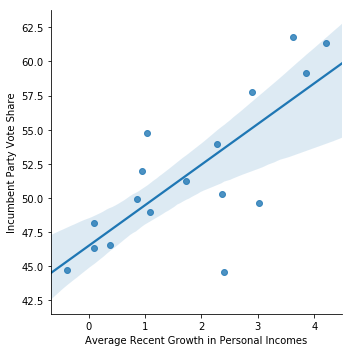

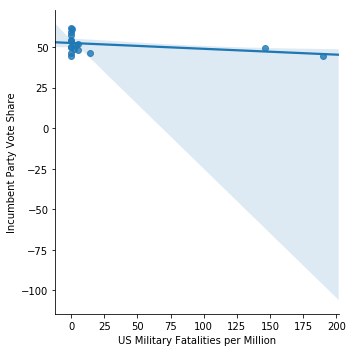

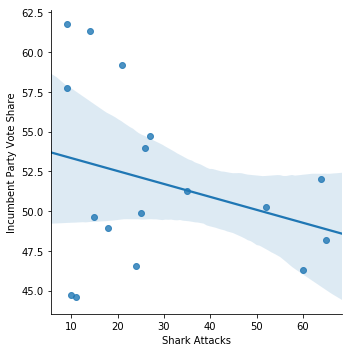

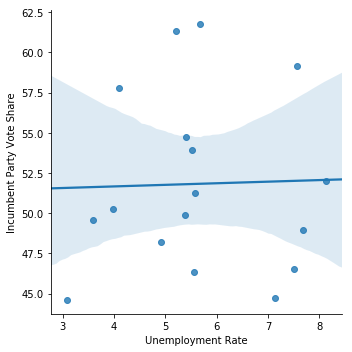

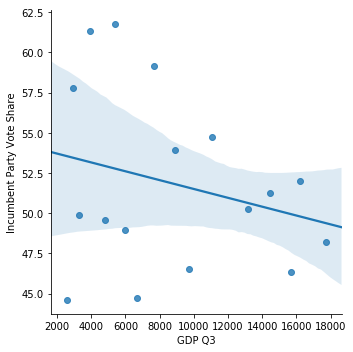

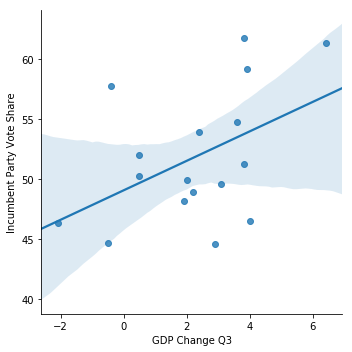

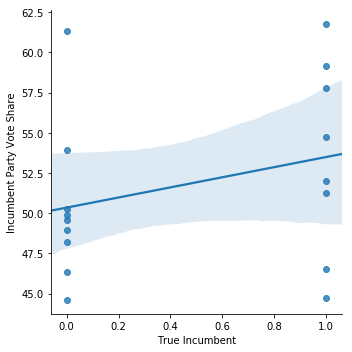

In [18]:
%matplotlib inline 
import seaborn as sns

target = 'Incumbent Party Vote Share'
features = ['Average Recent Growth in Personal Incomes',
            'US Military Fatalities per Million',
            'Shark Attacks',
            'Unemployment Rate',
            'GDP Q3',
            'GDP Change Q3',
            'True Incumbent']

for feature in features:
    sns.lmplot(x=feature,y=target,data=df)

We can see from the scatterplot that these data points seem to follow a somewhat linear relationship for the "Average Recent Growth in Personal Incomes" feature. This means that we could probably summarize their relationship well by fitting a line of best fit to these points. Lets do it.


## The Equation for a Line

A common equation for a line is:

\begin{align}
y = mx + b
\end{align}

Where $m$ is the slope of our line and $b$ is the y-intercept. 

If we want to plot a line through our cloud of points we figure out what these two values should be. Linear Regression seeks to **estimate** the slope and intercept values that describe a line that best fits the data points.

## The Anatomy of Linear Regression

- Intercept: The $b$ value in our line equation $y=mx+b$
- Slope: The $m$ value in our line equation $y=mx+b$. These two values together define our regression line.

![Slope and Intercept](http://www.ryanleeallred.com/wp-content/uploads/2018/08/linear-regression-diagram.png)

- $\hat{y}$ : A prediction
- Line of Best Fit (Regression Line)
- Predicted (fitted) Values: Points on our regression line
- Observed Values: Points from our dataset
- Error: The distance between predicted and observed values.

![Residual Error](http://www.ryanleeallred.com/wp-content/uploads/2018/08/residual-or-error.gif)


In [19]:
x = df['Average Recent Growth in Personal Incomes']
y = df['Incumbent Party Vote Share']

m = 0
b = y.mean()
y_pred = m*x+ b

Mean Absolute Error: 4.463806228373702
R^2: 0.0


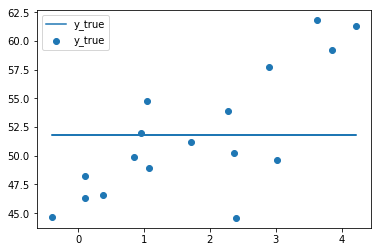

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

def plot_preds(x,y,y_pred):
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_true')
    plt.legend()
    
    mae = mean_absolute_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
    
plot_preds(x,y,y_pred)

Mean Absolute Error: 2.5776470588235294
R^2: 0.49271468230632887


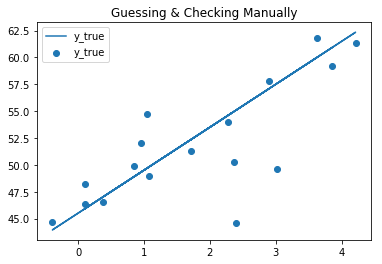

In [26]:
m = 4
b = 45.5
y_pred = m*x + b
plot_preds(x, y, y_pred)
plt.title('Guessing & Checking Manually');

## R Squared:  $R^2$

One final attribute of linear regressions that we're going to talk about today is a measure of goodness of fit known as $R^2$ or R-squared. $R^2$ is a statistical measure of how close the data are fitted to our regression line. A helpful interpretation for the $R^2$ is the percentage of the dependent variable that is explained by the model.

In other words, the $R^2$ is the percentage of y that is explained by the x variables included in the model. For this reason the $R^2$ is also known as the "coefficient of determination," because it explains how much of y is explained (or determined) by our x varaibles. We won't go into the calculation of $R^2$ today, just know that a higher $R^2$ percentage is nearly always better and indicates a model that fits the data more closely. 

## Residual Error 

The residual error is the distance between points in our dataset and our regression line.

Mean Absolute Error: 2.556470588235295
R^2: 0.5799637280695265


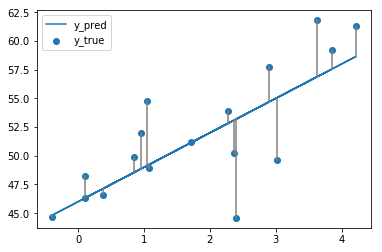

In [27]:
def regression_residuals(df, feature, target, m, b):
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    plt.scatter(x, y, label='y_true')
    plt.plot(x, y_pred, label='y_pred')
    plt.legend()
    
    # Plot residual errors
    for x, y1, y2 in zip(x, y, y_pred):
        plt.plot((x, x), (y1, y2), color='grey')
        
    mae = mean_absolute_error(y, y_pred) 
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
        
regression_residuals(df, feature='Average Recent Growth in Personal Incomes', 
                     target='Incumbent Party Vote Share', m=3, b=46)

Mean Absolute Error: 4.318823529411765
R^2: -0.11694279968912014


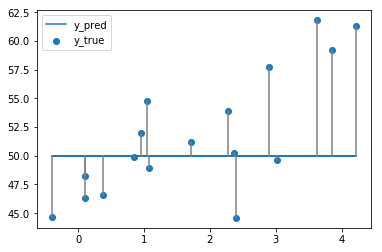

In [29]:
from ipywidgets import interact, fixed

interact(regression_residuals, 
         df=fixed(df), 
         feature=fixed('Average Recent Growth in Personal Incomes'), 
         target=fixed('Incumbent Party Vote Share'), 
         m=(-10,10,0.5), 
         b=(40,60,0.5));

## More Formal Notation

<img src="http://www.ryanleeallred.com/wp-content/uploads/2018/08/simple-regression-formula.png" width="600">

We have talked about a line of regression being represented like a regular line $y=mx+b$ but as we get to more complicated versions we're going to need to extend this equation. So lets establish the proper terminology.

**X** - Independent Variable, predictor variable, explanatory variable, regressor, covariate

**Y** - Response variable, predicted variable, measured vairable, explained variable, outcome variable

$\beta_0$ - "Beta Naught" or "Beta Zero", the intercept value. This is how much of y would exist if X were zero. This is sometimes represented by the letter "a" but I hate that. So it's "Beta 0" during my lecture.

$\beta_1$ - "Beta One" The primary coefficient of interest. This values is the slope of the line that is estimated by "minimizing the sum of the squared errors/residuals" - We'll get to that. 

$\epsilon$ - "Epsilon" The "error term", random noise, things outside of our model that affect y.

## Minimizing the Sum of the Squared Error

The most common method of estimating our $\beta$ parameters  is what's known as "Ordinary Least Squares" (OLS). (There are different methods of arriving at a line of best fit). OLS estimates the parameters that minimize the squared distance between each point in our dataset and our line of best fit. 

\begin{align}
SSE = \sum(y_i - \hat{y})^2
\end{align}


Mean Squared Error: 12.00542352941177
Root Mean Squared Error: 3.4648843457483207
Mean Absolute Error: 2.556470588235295
R^2: 0.5799637280695265


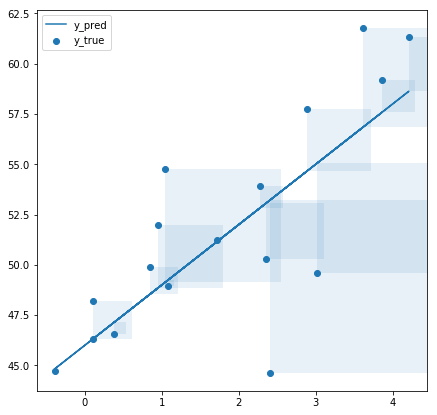

In [30]:
from matplotlib.patches import Rectangle
import numpy as np
from sklearn.metrics import mean_squared_error

def regression_squared_errors(df, feature, target, m, b):
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    ax.scatter(x, y, label='y_true')
    ax.plot(x, y_pred, label='y_pred')
    ax.legend()
    
    # Plot square errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
        
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)
    
regression_squared_errors(df, feature='Average Recent Growth in Personal Incomes', 
           target='Incumbent Party Vote Share', m=3, b=46)

Mean Squared Error: 31.924317647058828
Root Mean Squared Error: 5.650160851432358
Mean Absolute Error: 4.318823529411765
R^2: -0.11694279968912014


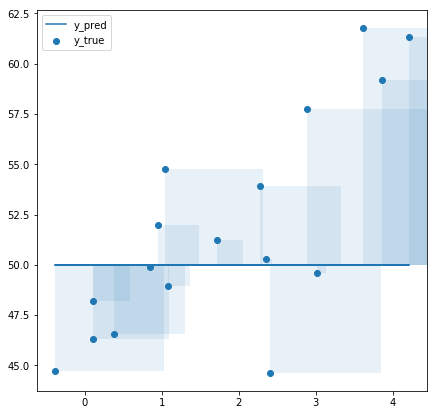

In [31]:
interact(regression_squared_errors, 
         df=fixed(df), 
         feature=fixed('Average Recent Growth in Personal Incomes'), 
         target=fixed('Incumbent Party Vote Share'), 
         m=(-10,10,0.5), 
         b=(40,60,0.5));

## Hypotheses

In [ ]:
b = 46
ms = np.arange(-10,10,0.5)
sses = []

for m in ms:
    predictions = m * df[feature] + b
    errors = predictions - df[target]
    square_errors = errors ** 2
    sse = square_errors.sum()
    sses.append(sse)
    
hypotheses = pd.DataFrame({'Slope': ms})
hypotheses['Intercept'] = b
hypotheses['Sum of Square Errors'] = sses

hypotheses

In [ ]:
hypotheses.plot(x='Slope', y='Sum of Square Errors', 
                title=f'Intercept={b}');

## Scikit-learn

#### Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

> Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

> 1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn. 
> 2. Choose model hyperparameters by instantiating this class with desired values. 
> 3. Arrange data into a features matrix and target vector following the discussion above.
> 4. Fit the model to your data by calling the `fit()` method of the model instance.
> 5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

In [ ]:
# TODO

## Linear Algebra!

The same result that is found by minimizing the sum of the squared errors can be also found through a linear algebra process known as the "Least Squares Solution:"

![OLS Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/OLS-linear-algebra.png)

Before we can work with this equation in its linear algebra form we have to understand how to set up the matrices that are involved in this equation. 

### The $\beta$ vector

The $\beta$ vector represents all the parameters that we are trying to estimate, our $y$ vector and $X$ matrix values are full of data from our dataset. The $\beta$ vector holds the variables that we are solving for: $\beta_0$ and $\beta_1$

Now that we have all of the necessary parts we can set them up in the following equation:

\begin{align}
y = X \beta + \epsilon
\end{align}

Since our $\epsilon$ value represents **random** error we can assume that it will equal zero on average.

\begin{align}
y = X \beta
\end{align}

The objective now is to isolate the $\beta$ matrix. We can do this by pre-multiplying both sides by "X transpose" $X^{T}$.

\begin{align}
X^{T}y =  X^{T}X \beta
\end{align}

Since anything times its transpose will result in a square matrix, if that matrix is then an invertible matrix, then we should be able to multiply both sides by its inverse to remove it from the right hand side. (We'll talk tomorrow about situations that could lead to $X^{T}X$ not being invertible.)

\begin{align}
(X^{T}X)^{-1}X^{T}y =  (X^{T}X)^{-1}X^{T}X \beta
\end{align}

Since any matrix multiplied by its inverse results in the identity matrix, and anything multiplied by the identity matrix is itself, we are left with only $\beta$ on the right hand side:

\begin{align}
(X^{T}X)^{-1}X^{T}y = \hat{\beta}
\end{align}

We will now call it "beta hat" $\hat{\beta}$ because it now represents our estimated values for $\beta_0$ and $\beta_1$

### Lets calculate our $\beta$ coefficients with numpy!

In [ ]:
# TODO

# Multiple Regression

Simple or bivariate linear regression involves a single $x$ variable and a single $y$ variable. However, we can have many $x$ variables. A linear regression model that involves multiple x variables is known as **Multiple** Regression (NOT MULTIVARIATE).

![Multiple Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/multiple-regression-model.png)

In [ ]:
from mpl_toolkits import mplot3d

def viz3D(fitted_model, df, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    features : list of strings, name of features 1 & 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)

In [ ]:
# TODO

# Dimensionality in Linear Regression!

Muliple Regression is simply an extension of the bivariate case. The reason why we see the bivariate case demonstrated so often is simply because it's easier to graph and all of the intuition from the bivariate case is the same as we keep on adding explanatory variables.

As we increase the number of $x$ values in our model we are simply fitting a n-1-dimensional plane to an n-dimensional cloud of points within an n-dimensional hypercube. 

# Interpreting Coefficients

One of Linear Regression's strengths is that the parameters of the model (coefficients) are readily interpretable and useful. Not only do they describe the relationship between x and y but they put a number on just how much x is associated with y. We should be careful to not speak about this relationshiop in terms of causality because these coefficients are in fact correlative measures. We would need a host of additional techniques in order to estimate a causal effect using linear regression (econometrics).

\begin{align}
\hat{\beta} = \frac{Cov(x,y)}{Var(y)}
\end{align}

Going back to the two equations for the two models that we have estimated so far, lets replace their beta values with their actual values to see if we can make sense of how to interpret these beta coefficients.

## Bivariate Model

$y_i = \beta_0 + \beta_1temperature + \epsilon$

$sales_i = -596.2 + 24.69temperature + \epsilon$

What might $\beta_0$ in this model represent? It represents the level of sales that we would have if temperature were 0. Since this is negative one way of interpreting it is that it's so cold outside that you would have to pay people to eat ice cream. A more appropriate interpretation is probably that the ice cream store owner should close his store down long before the temperature reaches 0 degrees farenheit (-17.7 celsius). The owner can compare his predicted sales with his costs of doing business to know how warm the weather has to get before he should open his store.

What might the $beta_1$ in this model reprsent? it represents the increase in sales for each degree of temperature increase. For every degree that the temperature goes up outside he has $25 more in sales.

## Multiple Regression Model

$y_i = \beta_0 + \beta_1age_i + \beta_2weight_i + \epsilon$

$BloodPressure_i = 30.99+ .86age_i + .33weight_i + \epsilon$

The interpretation of coefficients in this example are similar. The intercept value repesents the blood pressure a person would have if they were 0 years old and weighed 0 pounds. This not a super useful interpretation. If we look at our data it is unlikely that we have any measurements like these in the dataset. This means that our interpretation of our intercept likely comes from extrapolating the regression line (plane). Coefficients having straightforward interpretations is a strength of linear regression if we're careful about extrapolation and only interpreting our data within the context that it was gathered.

The interpretation of our other coefficients can be a useful indicator for how much a person similar to those in our dataset's blood pressure will go up on average with each additional year of age and pound of weight.

# Basic Model Validation

One of the downsides of relying on $R^2$ too much is that although it tells you when you're fitting the data well, it doesn't tell you when you're *overfitting* the data. The best way to tell if you're overfitting the data is to get some data that your model hasn't seen yet, and evaluate how your predictions do. This is essentially what "model validation" is.

# Why is Linear Regression so Important?

## Popularity 

Linear Regression is an extremely popular technique that every data scientist **needs** to understand. It's not the most advanced technique and there are supervised learning techniques that will obtain a higher accuracy, but where it lacks in accuracy it makes up for it in interpretability and simplicity.

## Interpretability

Few other models possess coefficients that are so directly linked to their variables with a such a clear interpretation. Tomorrow we're going to learn about ways to make them even easier to interpret.

## Simplicity

A linear regression model can be communicated just by writing out its equation. It's kind of incredible that such high dimensional relationships can be described from just a linear combination of variables and coefficients. 